In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("vvv -dataset.csv")
df.head()

,sno,Power-Rating,weight of copper,category
0,0,16.46,34.69,high
1,1,12.52,28.78,high
2,2,7.66,21.48,high
3,3,21.09,41.64,high
4,4,24.43,46.64,high


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("vvv -dataset.csv")
df.head()

,sno,Power-Rating,weight of copper,category
0,0,16.46,34.69,high
1,1,12.52,28.78,high
2,2,7.66,21.48,high
3,3,21.09,41.64,high
4,4,24.43,46.64,high


In [8]:
df=df.drop("sno",axis=1)
df.head()

,Power-Rating,weight of copper,category
0,16.46,34.69,1
1,12.52,28.78,1
2,7.66,21.48,1
3,21.09,41.64,1
4,24.43,46.64,1


In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("vvv -dataset.csv")
df.head()
k = {'low':0,'high':1}
df['category']=df['category'].map(k)
x = df[["Power-Rating","weight of copper"]]
y = df[["category"]]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.50,random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2,random_state=0)
clf.fit(X_train,y_train.values.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [10]:
df.head()

,sno,Power-Rating,weight of copper,category
0,0,16.46,34.69,1
1,1,12.52,28.78,1
2,2,7.66,21.48,1
3,3,21.09,41.64,1
4,4,24.43,46.64,1


In [11]:
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [12]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import accuracy_score
print("accuracy score",accuracy_score(y_test,y_pred))
print("mean_squared_error",mean_squared_error(y_test,y_pred))
from sklearn.metrics import confusion_matrix

accuracy score 1.0
mean_squared_error 0.0


In [15]:
y_true = y_test
data = confusion_matrix(y_true,y_pred)
data

array([[4, 0],
       [0, 9]], dtype=int64)

In [16]:
import seaborn as sn
df_cm = pd.DataFrame(data,columns = np.unique(y_true),index=np.unique(y_true))
df_cm.index.name = "Actual"
df_cm.columns.name = "pridicted"
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
df_cm


pridicted,0,1
Actual,,
0,4,0
1,0,9


<Figure size 1000x700 with 0 Axes>

<Axes: xlabel='pridicted', ylabel='Actual'>

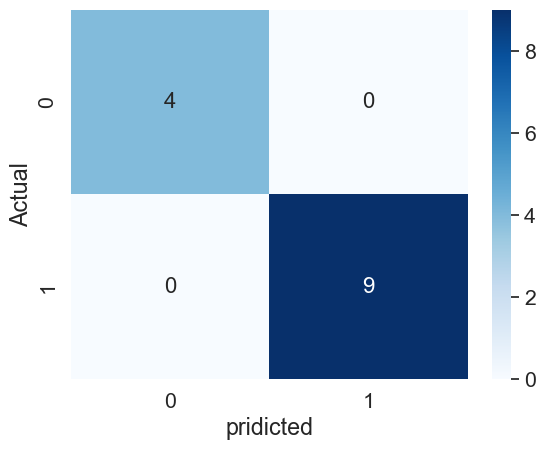

In [17]:
sn.heatmap(df_cm,cmap = "Blues",annot=True,annot_kws = {"size":16})